In [2]:
import pandas as pd
import numpy as np
import networkx as nx

df = pd.read_csv('./Data/pp_dep_2017_2019.csv', delimiter=';')
df

,HS6_i,HS6_j,f_ij,f_i,f_j,f,odds,pr_norm,link01,short_name_ENG_i,short_name_ENG_j
0,107111,106121,901,15723,3395,1189028,20.069737,0.905077,1,Fresh bread containing by,Wheat or meslin flour
1,107111,106140,769,15723,3072,1189028,18.930487,0.899651,1,Fresh bread containing by,"Bran, sharps and other re"
2,107112,106121,762,14496,3395,1189028,18.410225,0.896962,1,Cake and pastry products;,Wheat or meslin flour
3,251123,256220,665,13160,20715,1189028,2.900500,0.487245,1,Iron or steel equipment f,Metal parts (excluding tu
4,256210,256220,646,10228,20715,1189028,3.625342,0.567600,1,Turned metal parts for ta,Metal parts (excluding tu
...,...,...,...,...,...,...,...,...,...,...,...
243975,259316,275111,1,1486,547,1189028,1.462803,0.187917,1,Iron or steel hot-worked,Combined refrigerators-fr
243976,259313,275111,1,882,547,1189028,2.464542,0.422723,1,Endless bands for machine,Combined refrigerators-fr
243977,201462,181110,1,1976,473,1189028,1.272167,0.119783,1,Acetone,"Printed newspapers, journ"
243978,201464,181110,1,696,473,1189028,3.611783,0.566328,1,"Other organic compounds,","Printed newspapers, journ"


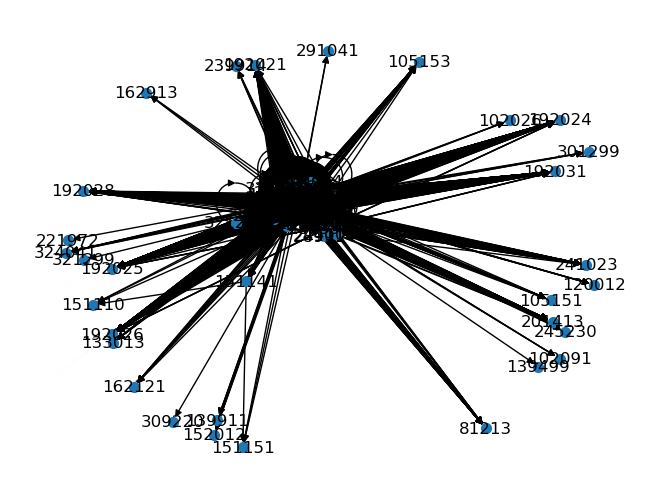

In [3]:
G = nx.DiGraph()

# Add the nodes

unique_product_codes = set(df['HS6_i']).union(set(df['HS6_j']))

G.add_nodes_from(unique_product_codes)

# Add the edges
for _, row in df.iterrows():
    product_i = row['HS6_i']
    product_j = row['HS6_j']
    weight = row['f_ij']
    G.add_edge(product_i, product_j, weight=weight)

# nx.draw(G,node_size=50,with_labels=True)


In [4]:
# Calculate the total value of weights
total_weight = sum([d['weight'] for u, v, d in G.edges(data=True)])

# Normalize weights using the total value
for u, v, d in G.edges(data=True):
    d['weight'] /= total_weight

# nx.draw(G,node_size=50,with_labels=True)


Density: 0.1278358034562509
Average in-degree: 176.54124457308248
Average out-degree: 176.54124457308248
Average total degree: 353.08248914616496


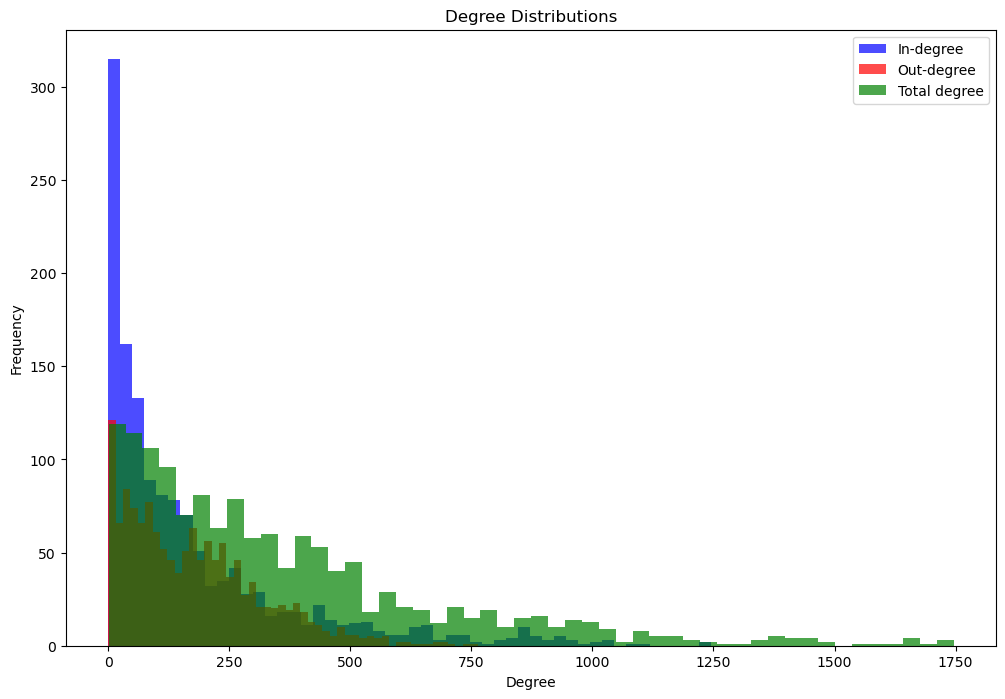

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have already created the directed graph G

# Density
density = nx.density(G)
print("Density:", density)

# Average degrees
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())
total_degrees = dict(G.degree())

average_in_degree = sum(in_degrees.values()) / len(in_degrees)
average_out_degree = sum(out_degrees.values()) / len(out_degrees)
average_total_degree = sum(total_degrees.values()) / len(total_degrees)

print("Average in-degree:", average_in_degree)
print("Average out-degree:", average_out_degree)
print("Average total degree:", average_total_degree)

# Degree distributions
in_degree_sequence = [degree for node, degree in G.in_degree()]
out_degree_sequence = [degree for node, degree in G.out_degree()]
total_degree_sequence = [degree for node, degree in G.degree()]

# Plot degree distributions
plt.figure(figsize=(12, 8))
plt.hist(in_degree_sequence, bins=50, color='blue', alpha=0.7, label='In-degree')
plt.hist(out_degree_sequence, bins=50, color='red', alpha=0.7, label='Out-degree')
plt.hist(total_degree_sequence, bins=50, color='green', alpha=0.7, label='Total degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distributions')
plt.legend()
plt.show()

Calculating best minimal value for power law fit


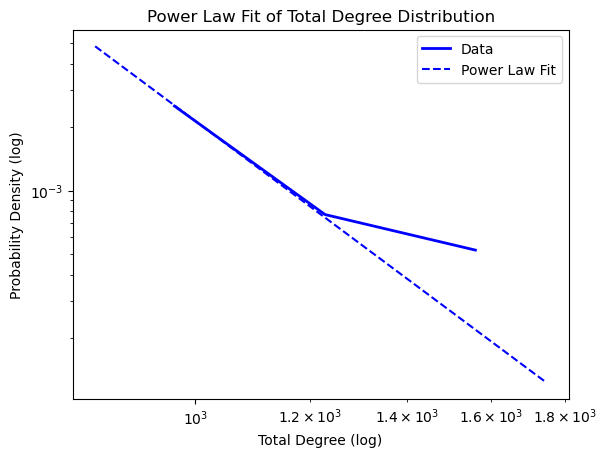

Alpha (scaling parameter): 5.120166391343056
Xmin (minimum value of the power law distribution): 853.0


In [6]:
import powerlaw

# Fit power law to the total degree distribution
fit = powerlaw.Fit(total_degree_sequence)

# Get the alpha (scaling parameter) and xmin (minimum value of the power law distribution)
alpha = fit.alpha
xmin = fit.xmin

# Plot the degree distribution and the power law fit
fig = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='b', linestyle='--', ax=fig)

# Visualize the data and the fit on a log-log scale
plt.xlabel('Total Degree (log)')
plt.ylabel('Probability Density (log)')
plt.title('Power Law Fit of Total Degree Distribution')
plt.legend(['Data', 'Power Law Fit'])
plt.show()

print("Alpha (scaling parameter):", alpha)
print("Xmin (minimum value of the power law distribution):", xmin)


In [7]:
As = nx.adjacency_matrix(G)
A =As.todense()
print(A)


[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 2.52306926e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.68204618e-06]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.68204618e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.68204618e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.68204618e-06]]


In [8]:
d = nx.degree(G)
d = dict(d)

print("average degree: ", sum(d.values())/len(G.nodes))

average degree:  353.08248914616496


(0.0, 1900.0)

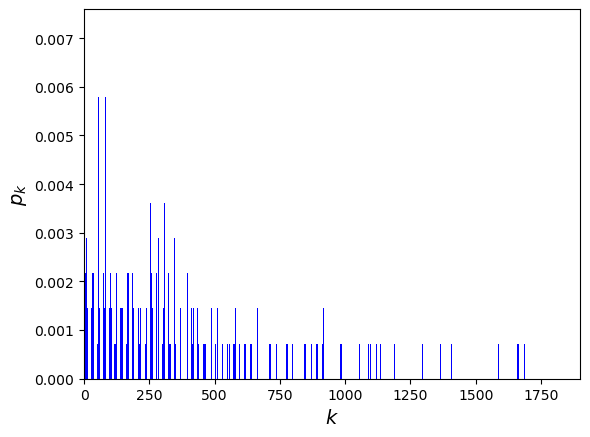

In [9]:
nx.degree_histogram(G)

import matplotlib.pyplot as plt
x = list(range(max(d.values())+1))
y = [i/len(G.nodes) for i in nx.degree_histogram(G)]
# print(x)
# print(y)

plt.bar(x, y, width=0.5, color="blue")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("$p_k$", fontsize=14)
plt.xlim([0,1900])

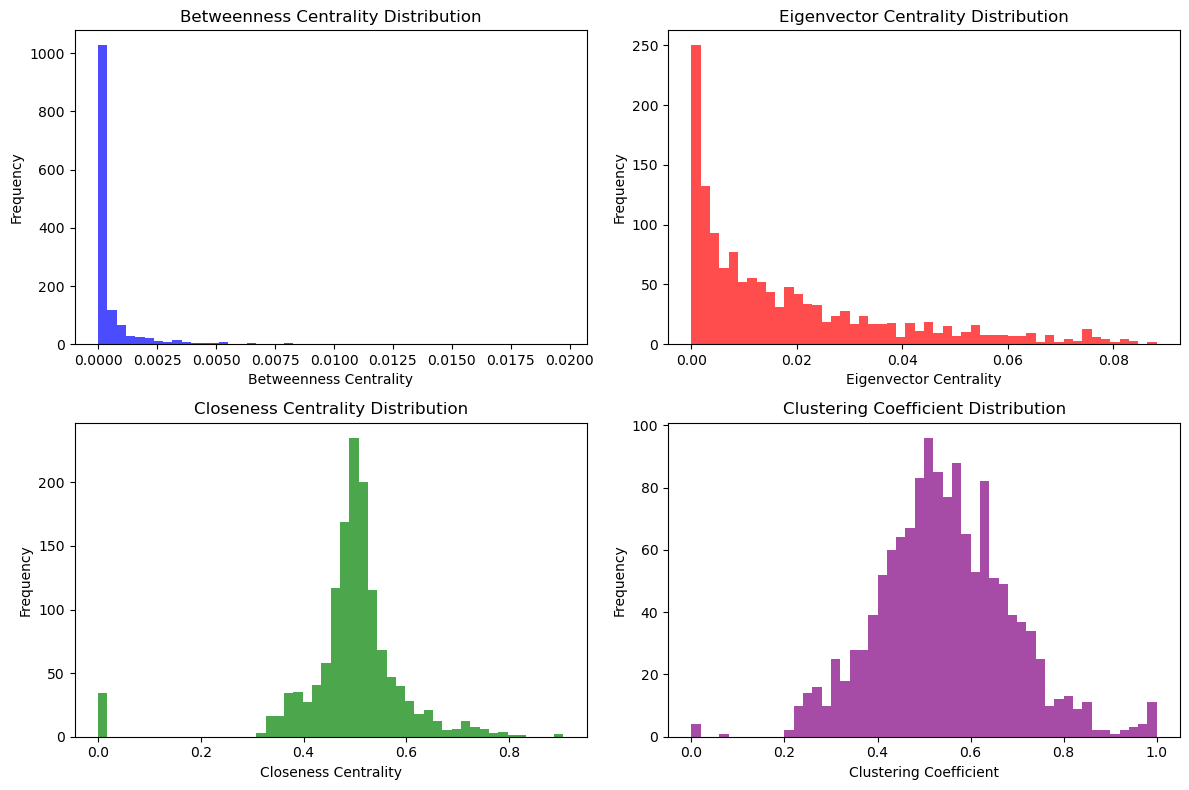

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have already created the directed graph G

# Betweenness Centrality
betweenness = nx.betweenness_centrality(G)

# Eigenvector Centrality
eigenvector = nx.eigenvector_centrality(G)

# Closeness Centrality
closeness = nx.closeness_centrality(G)

# Clustering Coefficient
clustering = nx.clustering(G)

# Plot distributions
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(list(betweenness.values()), bins=50, color='blue', alpha=0.7)
plt.title('Betweenness Centrality Distribution')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(list(eigenvector.values()), bins=50, color='red', alpha=0.7)
plt.title('Eigenvector Centrality Distribution')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(list(closeness.values()), bins=50, color='green', alpha=0.7)
plt.title('Closeness Centrality Distribution')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(list(clustering.values()), bins=50, color='purple', alpha=0.7)
plt.title('Clustering Coefficient Distribution')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [28]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have already created the directed graph G

# Identify isolated nodes
isolated_nodes = [node for node in G if G.degree(node) == 0]

# Remove isolated nodes
G.remove_nodes_from(isolated_nodes)

import networkx as nx

def average_shortest_path_length(graph):
    total_shortest_path_length = 0
    total_pairs = 0

    for source in graph.nodes():
        for target in graph.nodes():
            if source != target:
                try:
                    shortest_path_length = nx.shortest_path_length(graph, source=source, target=target)
                    total_shortest_path_length += shortest_path_length
                    total_pairs += 1
                except nx.NetworkXNoPath:
                    pass

    if total_pairs == 0:
        return float('nan')  # No pairs of nodes found

    return total_shortest_path_length / total_pairs

# Assuming you have already created the directed graph G
average_shortest_path = average_shortest_path_length(G)
print("Average Shortest Path Length:", average_shortest_path)


Average Shortest Path Length: 1.9736670440780637


In [32]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have already created the directed graph G

# Identify isolated nodes
isolated_nodes = [node for node, degree in G.degree() if degree == 0]

# Remove isolated nodes
G.remove_nodes_from(isolated_nodes)

# Compute the largest weakly connected component
largest_weakly_connected_component_nodes = max(nx.weakly_connected_components(G), key=len)
largest_weakly_connected_component = G.subgraph(largest_weakly_connected_component_nodes)

# Compute the efficiency of the largest weakly connected component
total_efficiency = 0
total_pairs = 0
for node in largest_weakly_connected_component:
    shortest_paths = nx.shortest_path_length(largest_weakly_connected_component, source=node)
    for target, length in shortest_paths.items():
        if length != 0:  # Exclude the node itself
            total_efficiency += 1 / length
            total_pairs += 1

average_efficiency = total_efficiency / total_pairs

print("Average Efficiency (Largest Weakly Connected Component):", average_efficiency)


Average Efficiency (Largest Weakly Connected Component): 0.5490051128094914


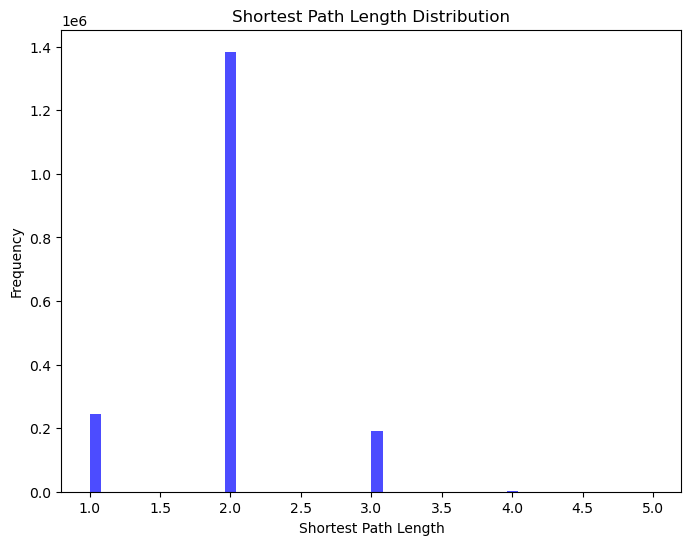

In [35]:
import networkx as nx
import matplotlib.pyplot as plt

def average_shortest_path_length(graph):
    shortest_path_lengths = []

    for source in graph.nodes():
        for target in graph.nodes():
            if source != target:
                try:
                    shortest_path_length = nx.shortest_path_length(graph, source=source, target=target)
                    shortest_path_lengths.append(shortest_path_length)
                except nx.NetworkXNoPath:
                    pass

    return shortest_path_lengths

# Assuming you have already created the directed graph G
shortest_path_lengths = average_shortest_path_length(G)

# Plot distribution
plt.figure(figsize=(8, 6))
plt.hist(shortest_path_lengths, bins=50, color='blue', alpha=0.7)
plt.title('Shortest Path Length Distribution')
plt.xlabel('Shortest Path Length')
plt.ylabel('Frequency')
plt.show()


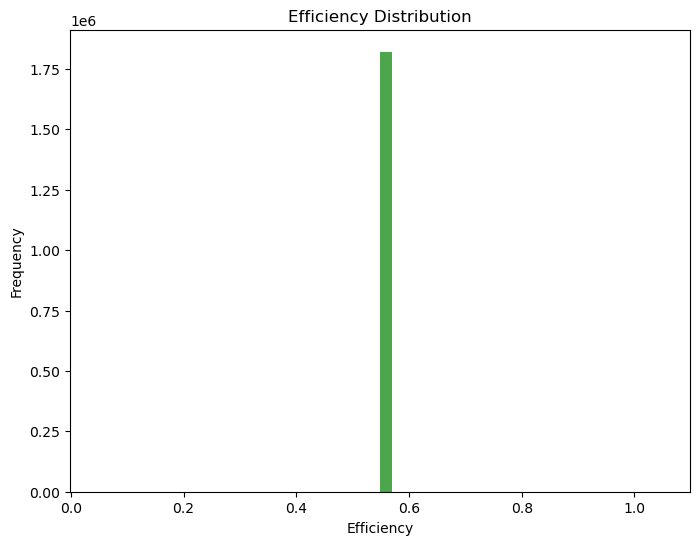

In [36]:
import networkx as nx
import matplotlib.pyplot as plt

def compute_efficiency(graph):
    total_efficiency = 0
    total_pairs = 0

    for node in graph:
        shortest_paths = nx.shortest_path_length(graph, source=node)
        for target, length in shortest_paths.items():
            if length != 0:  # Exclude the node itself
                total_efficiency += 1 / length
                total_pairs += 1

    if total_pairs == 0:
        return []

    return [total_efficiency / total_pairs] * total_pairs

# Assuming you have already created the directed graph G and computed the largest weakly connected component
largest_weakly_connected_component_nodes = max(nx.weakly_connected_components(G), key=len)
largest_weakly_connected_component = G.subgraph(largest_weakly_connected_component_nodes)

# Compute efficiency distribution
efficiency_values = compute_efficiency(largest_weakly_connected_component)

# Plot distribution
plt.figure(figsize=(8, 6))
plt.hist(efficiency_values, bins=50, color='green', alpha=0.7)
plt.title('Efficiency Distribution')
plt.xlabel('Efficiency')
plt.ylabel('Frequency')
plt.show()


In [39]:
import networkx as nx

# Assuming you have already created the directed graph G

# Identify isolated nodes
isolated_nodes = [node for node in G if G.degree(node) == 0]

# Remove isolated nodes
G.remove_nodes_from(isolated_nodes)

# Get the largest weakly connected component
largest_weakly_connected_component = max(nx.weakly_connected_components(G), key=len)

# Compute the subgraph of the largest weakly connected component
largest_weakly_connected_subgraph = G.subgraph(largest_weakly_connected_component)

# Compute the shortest path lengths between all pairs of nodes
all_shortest_paths = nx.shortest_path_length(largest_weakly_connected_subgraph)

# Initialize a set to store the products with the shortest path lengths (shortest >= 2)
products_shortest_path = set()

# Iterate over all pairs of nodes and their shortest path lengths
for source, lengths in all_shortest_paths:
    for target, length in lengths.items():
        if source != target and length >= 2:  # Exclude the node itself and paths of length less than 2
            products_shortest_path.add(source)
            products_shortest_path.add(target)

print("Products in the network with the shortest path lengths (>=2):", products_shortest_path)


Products in the network with the shortest path lengths (>=2): {131081, 131082, 131083, 131085, 221199, 131092, 131099, 139299, 139311, 139312, 139313, 352310, 254011, 254013, 254014, 172111, 172112, 172113, 172114, 172115, 254099, 139412, 139411, 139420, 172199, 172211, 172212, 139499, 139510, 172299, 172311, 172312, 172313, 172314, 205111, 205112, 205114, 205120, 139599, 139613, 139614, 139615, 139616, 139617, 172399, 172411, 205210, 139699, 279011, 279012, 279013, 279020, 279031, 279032, 279033, 205310, 279041, 279043, 279044, 279045, 279052, 279053, 279060, 279070, 279082, 279099, 205399, 107111, 107112, 139911, 139912, 139913, 139915, 107199, 99019, 107212, 107211, 107219, 221910, 139999, 221920, 221930, 353011, 221940, 353012, 221950, 271110, 271121, 271122, 271123, 271124, 221973, 271125, 221971, 221972, 107299, 271141, 271142, 271143, 271150, 221999, 107311, 107312, 271161, 271162, 271199, 263011, 263012, 263013, 271210, 263022, 263023, 172911, 271221, 181110, 271222, 263030, 27

In [44]:

# Find all shortest paths
all_shortest_paths = nx.shortest_path(G)

# Initialize dictionaries to store products for shortest and longest paths
shortest_products = {}
longest_products = {}

# Iterate over shortest paths and extract products
for source in all_shortest_paths:
    for target in all_shortest_paths[source]:
        if source != target:
            path = all_shortest_paths[source][target]
            if len(path) >= 2:
                if len(path) not in shortest_products:
                    shortest_products[len(path)] = set()
                shortest_products[len(path)].update(path[1:])  # Exclude the source node
                
                # Check if the current path length is greater than the previously recorded longest path length
                if len(path) > max(longest_products.keys(), default=0):
                    longest_products.clear()
                    longest_products[len(path)] = set()
                    longest_products[len(path)].update(path[1:])  # Exclude the source node
                elif len(path) == max(longest_products.keys()):
                    longest_products[len(path)].update(path[1:])  # Exclude the source node

# Print shortest path lengths and products
print("Shortest Paths:")
for length, products in shortest_products.items():
    print(f"Length {length}: {products}")

# Print longest path lengths and products
print("\nLongest Paths:")
for length, products in longest_products.items():
    print(f"Length {length}: {products}")

Shortest Paths:
Length 2: {131081, 131082, 131083, 131085, 221199, 131092, 131099, 139299, 139311, 139312, 139313, 352310, 254013, 254014, 172111, 172112, 172113, 172114, 172115, 139411, 139412, 254099, 139420, 172199, 172211, 172212, 139499, 139510, 172299, 172311, 172312, 172313, 172314, 205111, 205112, 205114, 205120, 139599, 139613, 139614, 139615, 139616, 139617, 172399, 172411, 205210, 139699, 279011, 279012, 279013, 279020, 279031, 279032, 279033, 205310, 279041, 279043, 279044, 279045, 279052, 279053, 279060, 279070, 279082, 279099, 205399, 107111, 107112, 139911, 139912, 139913, 139915, 107199, 107211, 107212, 99019, 107219, 221910, 139999, 221920, 221930, 353011, 353012, 221940, 221950, 271110, 271121, 271122, 271123, 271124, 221973, 271125, 221971, 221972, 107299, 271141, 271142, 271143, 271150, 221999, 107311, 107312, 271161, 271162, 271199, 263011, 263012, 263013, 271210, 263022, 172911, 263023, 271221, 181110, 172919, 271222, 263030, 271224, 271223, 271231, 263040, 271232

In [43]:
import networkx as nx

# Assuming you have already created the directed graph G

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
highest_bc_product = max(betweenness_centrality, key=betweenness_centrality.get)
print("Product with Highest Betweenness Centrality:", highest_bc_product)

# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
highest_ec_product = max(eigenvector_centrality, key=eigenvector_centrality.get)
print("Product with Highest Eigenvector Centrality:", highest_ec_product)

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
highest_cc_product = max(closeness_centrality, key=closeness_centrality.get)
print("Product with Highest Closeness Centrality:", highest_cc_product)

# Shortest Paths
shortest_paths = nx.shortest_path_length(G)
shortest_paths_at_least_2 = [(source, target) for source, lengths in shortest_paths for target, length in lengths.items() if length >= 2]
shortest_paths_at_least_2_products = [product for path in shortest_paths_at_least_2 for product in path]
shortest_paths_at_least_2_products = set(shortest_paths_at_least_2_products)
print("Products with Shortest Paths of Length at Least 2:", shortest_paths_at_least_2_products)

# Longest Paths
longest_path_lengths = nx.all_pairs_shortest_path_length(G)
longest_path_length_products = []
for source, lengths in longest_path_lengths:
    max_length = max(lengths.values())
    if max_length >= 2:
        longest_path_length_products.append(source)
print("Products with Longest Paths of Length at Least 2:", longest_path_length_products)


Product with Highest Betweenness Centrality: 256220
Product with Highest Eigenvector Centrality: 352310
Product with Highest Closeness Centrality: 352310
Products with Shortest Paths of Length at Least 2: {131081, 131082, 131083, 131085, 221199, 131092, 131099, 139299, 139311, 139312, 139313, 352310, 254011, 254013, 254014, 172111, 172112, 172113, 172114, 172115, 254099, 139412, 139411, 139420, 172199, 172211, 172212, 139499, 139510, 172299, 172311, 172312, 172313, 172314, 205111, 205112, 205114, 205120, 139599, 139613, 139614, 139615, 139616, 139617, 172399, 172411, 205210, 139699, 279011, 279012, 279013, 279020, 279031, 279032, 279033, 205310, 279041, 279043, 279044, 279045, 279052, 279053, 279060, 279070, 279082, 279099, 205399, 107111, 107112, 139911, 139912, 139913, 139915, 107199, 99019, 107212, 107211, 107219, 221910, 139999, 221920, 221930, 353011, 221940, 353012, 221950, 271110, 271121, 271122, 271123, 271124, 221973, 271125, 221971, 221972, 107299, 271141, 271142, 271143, 271

In [41]:
import networkx as nx
import community

# Assuming you have already created the directed graph G
# Assuming you have already created the directed graph G

# Assortativity
assortativity = nx.degree_assortativity_coefficient(G)
print("Assortativity Coefficient:", assortativity)

# Community Detection
# Girvan-Newman algorithm
communities_gn = nx.community.girvan_newman(G)
best_partition_gn = next(communities_gn)
print("Communities (Girvan-Newman):", best_partition_gn)

# # Louvain algorithm
# partition_louvain = community.best_partition(G)
# print("Communities (Louvain):", partition_louvain)


# Number of out-degree and in-degree only products
outdegree_only_products = [node for node in G.nodes() if G.out_degree(node) > 0 and G.in_degree(node) == 0]
indegree_only_products = [node for node in G.nodes() if G.in_degree(node) > 0 and G.out_degree(node) == 0]

num_outdegree_only = len(outdegree_only_products)
num_indegree_only = len(indegree_only_products)
total_nodes = len(G.nodes())

percentage_outdegree_only = (num_outdegree_only / total_nodes) * 100
percentage_indegree_only = (num_indegree_only / total_nodes) * 100

print("Number of Out-degree Only Products:", num_outdegree_only)
print("Percentage of Out-degree Only Products:", percentage_outdegree_only)
print("Number of In-degree Only Products:", num_indegree_only)
print("Percentage of In-degree Only Products:", percentage_indegree_only)


Assortativity Coefficient: -0.22872186898020302
Communities (Girvan-Newman): ({131081, 131082, 131083, 131085, 221199, 131092, 131099, 139299, 139311, 139312, 139313, 352310, 254011, 254013, 254014, 172111, 172112, 172113, 172114, 172115, 139411, 139412, 254099, 139420, 172199, 172211, 172212, 139499, 139510, 172299, 172311, 172312, 172313, 172314, 205111, 205112, 205114, 205120, 139599, 139613, 139614, 139615, 139616, 139617, 172399, 172411, 205210, 139699, 279011, 279012, 279013, 279020, 279031, 279032, 279033, 205310, 279041, 279043, 279044, 279045, 279052, 279053, 279060, 279070, 279082, 279099, 205399, 107111, 107112, 139911, 139912, 139913, 139915, 107199, 107211, 107212, 99019, 107219, 221910, 139999, 221920, 221930, 353011, 353012, 221940, 221950, 271110, 271121, 271122, 271123, 221971, 271124, 271125, 221973, 221972, 107299, 271141, 271142, 271143, 271150, 107311, 221999, 107312, 271161, 271162, 271199, 263011, 263012, 263013, 271210, 263022, 172911, 263023, 271221, 263030, 17

In [45]:
import networkx as nx

def average_shortest_path_length(graph):
    shortest_path_lengths = []

    for source in graph.nodes():
        for target in graph.nodes():
            if source != target:
                try:
                    shortest_path_length = nx.shortest_path_length(graph, source=source, target=target)
                    shortest_path_lengths.append(shortest_path_length)
                except nx.NetworkXNoPath:
                    pass

    return sum(shortest_path_lengths) / len(shortest_path_lengths) if shortest_path_lengths else float('nan')

# Assuming you have already created the directed graph G

# Get the number of nodes and edges in the dependency network
num_nodes = len(G.nodes())
num_edges = len(G.edges())

# Calculate the edge probability for the ER random graph
p = num_edges / (num_nodes * (num_nodes - 1))

# Generate the equivalent ER random graph
er_graph = nx.erdos_renyi_graph(num_nodes, p)

# Calculate average shortest path length and clustering coefficient for the dependency network
avg_shortest_path_dependency = average_shortest_path_length(G)
clustering_coeff_dependency = nx.average_clustering(G)

# Calculate average shortest path length and clustering coefficient for the ER random graph
avg_shortest_path_er = average_shortest_path_length(er_graph)
clustering_coeff_er = nx.average_clustering(er_graph)

# Print the results
print("Dependency Network:")
print("- Average Shortest Path Length:", avg_shortest_path_dependency)
print("- Clustering Coefficient:", clustering_coeff_dependency)

print("ER Random Graph:")
print("- Average Shortest Path Length:", avg_shortest_path_er)
print("- Clustering Coefficient:", clustering_coeff_er)


Dependency Network:
- Average Shortest Path Length: 1.9736670440780637
- Clustering Coefficient: 0.5431552697999804
ER Random Graph:
- Average Shortest Path Length: 1.8720929379599716
- Clustering Coefficient: 0.12791616381418294


In [ ]:
import networkx as nx

# Assuming you have already created the directed graph G

# Step 1: Calculate node vulnerability
def calculate_node_vulnerability(G, node):
    degree_centrality = nx.degree_centrality(G)
    neighbor_vulnerabilities = [degree_centrality[neighbor] for neighbor in G.neighbors(node)]
    node_vulnerability = degree_centrality[node] * sum(neighbor_vulnerabilities)
    return node_vulnerability

node_vulnerabilities = {node: calculate_node_vulnerability(G, node) for node in G.nodes()}

# Step 2: Calculate Economic Systemic Risk Index (ESRI)
def calculate_esri(G, node, node_vulnerabilities):
    esri = 0
    for neighbor in G.neighbors(node):
        edge_weight = G[node][neighbor]['weight']
        esri += node_vulnerabilities[neighbor] * edge_weight
    return esri

esri_scores = {node: calculate_esri(G, node, node_vulnerabilities) for node in G.nodes()}

# Rank products by ESRI scores
ranked_products = sorted(esri_scores, key=esri_scores.get, reverse=True)

# Print ranked products with ESRI scores
print("Ranked Products by ESRI Scores:")
for i, product in enumerate(ranked_products, start=1):
    print(f"{i}. Product: {product} | ESRI Score: {esri_scores[product]}")

# Print systemically risky products (top 10 for example)
top_risky_products = ranked_products[:10]  # Adjust the number as needed
print("\nTop Systemically Risky Products:")
for product in top_risky_products:
    print(product)


Ranked Products by ESRI Scores:
1. Product: 293230 | ESRI Score: 2.144846483701393
2. Product: 251123 | ESRI Score: 1.6831581488291079
3. Product: 256220 | ESRI Score: 1.4302327717960703
4. Product: 256210 | ESRI Score: 1.3720053741539524
5. Product: 222929 | ESRI Score: 1.3287042525697943
6. Product: 107111 | ESRI Score: 1.283588592136321
7. Product: 107112 | ESRI Score: 1.1841330011395885
8. Product: 353011 | ESRI Score: 1.0165312669233109
9. Product: 259929 | ESRI Score: 0.9084684657077698
10. Product: 351110 | ESRI Score: 0.85518456327872
11. Product: 101314 | ESRI Score: 0.8342631273004647
12. Product: 360011 | ESRI Score: 0.8127465527227916
13. Product: 256290 | ESRI Score: 0.7777170071432543
14. Product: 109110 | ESRI Score: 0.7571998411978814
15. Product: 331219 | ESRI Score: 0.7540892914157604
16. Product: 222991 | ESRI Score: 0.752672169904319
17. Product: 289939 | ESRI Score: 0.7346420460678513
18. Product: 222219 | ESRI Score: 0.7064763212417158
19. Product: 351410 | ESRI S